# Take a look at the bootstrapped metrics

In [3]:
import pandas as pd 
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [4]:
df_results = pd.read_csv('../results/results_lightgbm.csv')

In [13]:
df_mean = pd.read_csv('../results/results_mean_dummy.csv')

In [14]:
df_median = pd.read_csv('../results/results_median_dummy.csv')

In [15]:
df_median.head()

,r2,mae,mse,mdae,median_delta_e,mean_delta_e
0,-0.399401,0.265633,0.187768,0.051634,25.701850,29.198581
1,-0.404005,0.273148,0.196610,0.056209,27.503301,30.282299
2,-0.388212,0.265136,0.189733,0.051634,20.115557,29.622106
3,-0.402876,0.276002,0.200859,0.054575,27.503301,29.521307
4,-0.326920,0.242345,0.169424,0.039869,18.061254,26.203001


In [37]:
maes =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'mae': list(df_results['mae']) + list(df_mean['mae']) + list(df_median['mae'])
         }

In [38]:
delta_es =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'es': list(df_results['median_delta_e']) + list(df_mean['median_delta_e']) + list(df_median['median_delta_e'])
         }

In [48]:
delta_r2 =   {'model': ['GBDT'] * len(df_results) + ['mean dummy'] * len(df_mean) + ['median dummy'] * len(df_median),
          'r2': list(df_results['r2']) + list(df_mean['r2']) + list(df_median['r2'])
         }

In [39]:
df_mae = pd.DataFrame(maes)

In [40]:
df_es = pd.DataFrame(delta_es)

In [50]:
df_r2 = pd.DataFrame(delta_r2)

/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  import sys
/Users/kevinmaikjablonka/opt/miniconda3/envs/colorml2/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  


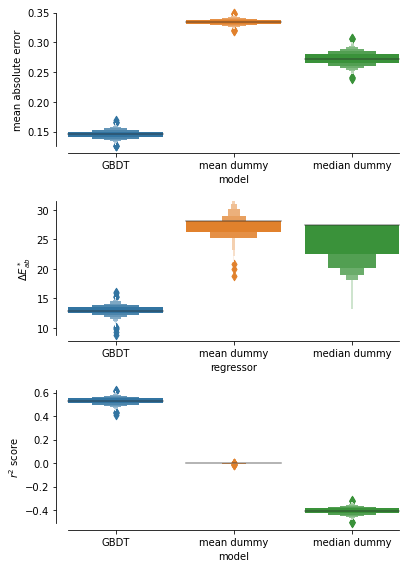

In [58]:
fig, ax = plt.subplots(3,1, figsize=(6,8))


for a in ax:
    a.spines['top'].set_color('none')
    a.spines['right'].set_color('none')
    a.spines['left'].set_smart_bounds(True)
    a.spines['bottom'].set_smart_bounds(True)

sns.boxenplot(data=df_mae, x='model', y='mae', ax=ax[0])
sns.boxenplot(data=df_es, x='model', y='es', ax=ax[1])
sns.boxenplot(data=df_r2, x='model', y='r2', ax=ax[2])

ax[1].set_xlabel('regressor')
ax[0].set_ylabel('mean absolute error')
ax[1].set_ylabel(r'$\Delta E^*_{ab}$')
ax[2].set_ylabel(r'$r^2$ score')

fig.tight_layout()

fig.savefig('../results/metrics_bootsrapped.pdf', bbox_inches='tight')

In [82]:
np.percentile(df_results['median_delta_e'], 95)

14.325039800601662

In [83]:
np.percentile(df_results['median_delta_e'], 5)

11.698265867580194

In [84]:
df_results['median_delta_e'].mean()

12.948571938128222